# __packages__

In [1]:
import os, sys, json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, os.getcwd() + "/../preprocess/")
pickle_path_tracks = "../sampled_data/sampled_data_tracks_final.pickle"
pickle_path_track_artist = "../sampled_data/sampled_data_track_artist_final.pickle"

---
# __functions__

In [2]:
# plot function
def plot_histogram(nums, title=None, bins=None):
    fig, ax = plt.subplots()
    if bins:
        counts, bins, patches = ax.hist(nums, bins=bins, density=False)
    else:
        counts, bins, patches = ax.hist(nums, density=False)
    
    if title:
        plt.title(title)
    plt.show()
    
    return counts, bins, patches

def plot_heatmap(groupby, pivot_col, title=None):
    
    assert type(pivot_col) == list and len(pivot_col) == 3
    
    groupby = groupby.reset_index()
    groupby_pivoted = groupby.pivot(*pivot_col)
    
    if title:
        sns.heatmap(groupby_pivoted, annot=True, fmt=".2f").set(title=title)
    else:
        sns.heatmap(groupby_pivoted, annot=True, fmt=".2f")

---
# __tracks__

### 1) load tracks data and apply basic statistics
### 2) remove outliers for duration

In [3]:
from spotify_tracks_preprocess import pre_processed_df

# load data
tracks = pre_processed_df()
tracks["duration_m"] = tracks.duration_ms.apply(lambda x: x / 60000)
print(f"columns: \n{tracks.dtypes}")
print()
print(tracks.isna().sum())

# basic statistics
stat = tracks.describe(percentiles=[.25, .5, .75, .95])
stat

columns: 
track_id         object
album_id         object
artists_id       object
disc_number       int64
duration_ms       int64
explicit           bool
name             object
popularity        int64
track_number      int64
duration_m      float64
dtype: object

track_id        0
album_id        0
artists_id      0
disc_number     0
duration_ms     0
explicit        0
name            0
popularity      0
track_number    0
duration_m      0
dtype: int64


,disc_number,duration_ms,popularity,track_number,duration_m
count,2.258987e+06,2.258987e+06,2.258987e+06,2.258987e+06,2.258987e+06
mean,1.046625e+00,2.475830e+05,1.336007e+01,6.899378e+00,4.126383e+00
std,4.638743e-01,1.675452e+05,1.389800e+01,7.600618e+00,2.792420e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.842090e+05,1.000000e+00,2.000000e+00,3.070150e+00
50%,1.000000e+00,2.252400e+05,9.000000e+00,5.000000e+00,3.754000e+00
75%,1.000000e+00,2.782800e+05,2.100000e+01,9.000000e+00,4.638000e+00
95%,1.000000e+00,4.330000e+05,4.100000e+01,1.800000e+01,7.216667e+00
max,5.200000e+01,2.074458e+07,9.200000e+01,5.460000e+02,3.457429e+02


In [4]:
# remove outliers for duration
print(f"before shape: {tracks.shape}")
tracks = tracks.loc[tracks.duration_m <= stat.loc["95%", "duration_m"]]

print(f"after shape: {tracks.shape}")

before shape: (2258987, 10)
after shape: (2146074, 10)


### 3) plotting by columns

columns: duration_m


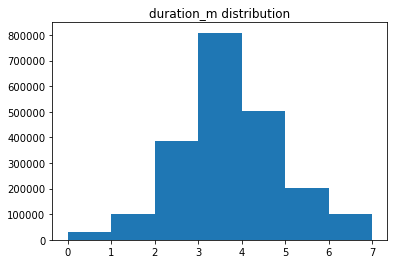


        bins   : [0 1 2 3 4 5 6 7]
        counts : [28950, 100829, 385408, 808621, 502811, 204172, 100581]
          
columns: popularity


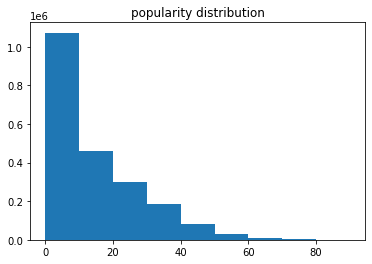


        bins   : [ 0 10 20 30 40 50 60 70 80 90]
        counts : [1073479, 458430, 301500, 183268, 84276, 32530, 10036, 2279, 273]
          


In [5]:
col_list = ["duration_m", "popularity"]

for col in col_list:
    print(f"columns: {col}")

    if col == "duration_m":
        bins = range(0, 8, 1)
    elif col == "popularity":
        bins = range(0, 100, 10)
        
    counts, bins, patches = plot_histogram(
                                tracks[col].tolist(), 
                                title=f"{col} distribution",
                                bins=bins
                            )
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __audio-features__

### 1) load audio-features data and apply basic statistics

In [6]:
from spotify_audio_features_preprocess import pre_processed_df

# load data
audio_features = pre_processed_df()
print(f"columns: \n{audio_features.dtypes}")
print()
print(audio_features.isna().sum())

stat = audio_features.describe()
stat

columns: 
track_id             object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06
mean,3.547740e-01,5.504296e-01,5.848759e-01,2.208220e-01,2.091071e-01,-9.660528e+00,6.549779e-01,8.923351e-02,1.199894e+02,3.879917e+00,4.757061e-01
std,3.543964e-01,1.845300e-01,2.660167e-01,3.494054e-01,1.898148e-01,5.626076e+00,4.753756e-01,1.152086e-01,2.992179e+01,4.720420e-01,2.699766e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.220000e-02,4.270000e-01,3.890000e-01,0.000000e+00,9.570000e-02,-1.191000e+01,0.000000e+00,3.540000e-02,9.693900e+01,4.000000e+00,2.470000e-01
50%,2.150000e-01,5.650000e-01,6.220000e-01,6.030000e-04,1.280000e-01,-8.176000e+00,1.000000e+00,4.700000e-02,1.200070e+02,4.000000e+00,4.660000e-01
75%,6.910000e-01,6.890000e-01,8.090000e-01,4.210000e-01,2.640000e-01,-5.826000e+00,1.000000e+00,8.380000e-02,1.380530e+02,4.000000e+00,6.970000e-01
max,9.960000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,4.923000e+00,1.000000e+00,9.710000e-01,2.499870e+02,5.000000e+00,1.000000e+00


### 2) plotting by columns

columns: acousticness


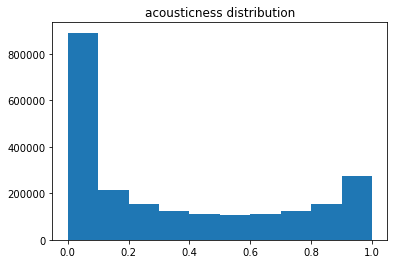


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [890537, 214072, 153003, 122124, 109713, 107108, 111217, 124646, 153876, 275895]
          
columns: danceability


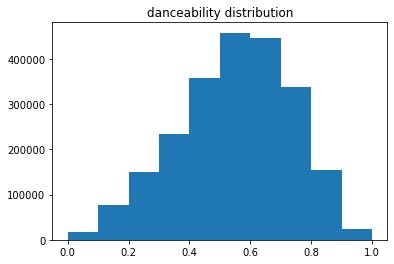


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [18090, 76886, 149794, 234752, 358519, 458618, 447122, 339468, 155488, 23454]
          
columns: energy


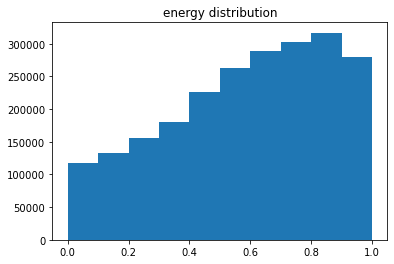


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [118218, 132340, 155959, 179762, 226047, 263194, 288838, 301902, 316847, 279084]
          
columns: instrumentalness


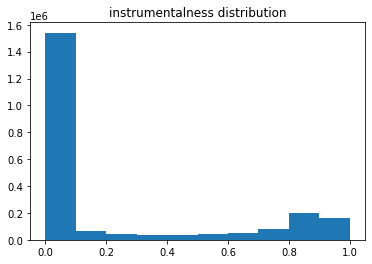


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1540961, 64172, 45327, 38185, 37449, 40944, 51126, 81613, 197796, 164618]
          
columns: liveness


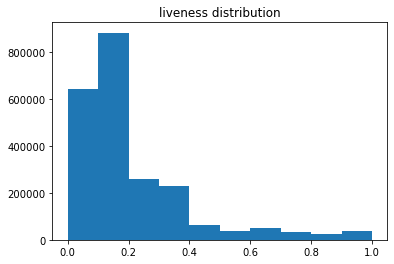


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [643705, 882672, 258940, 229404, 61913, 39516, 48563, 33730, 24144, 39604]
          
columns: loudness


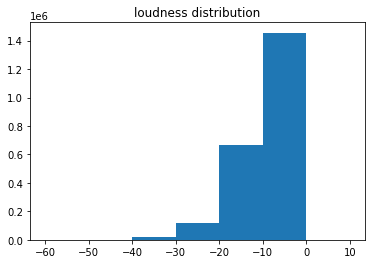


        bins   : [-60 -50 -40 -30 -20 -10   0  10]
        counts : [281, 1428, 16952, 120776, 666086, 1455721, 947]
          
columns: mode


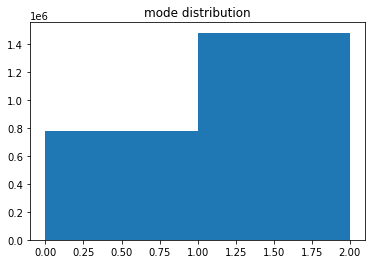


        bins   : [0 1 2]
        counts : [780506, 1481685]
          
columns: speechiness


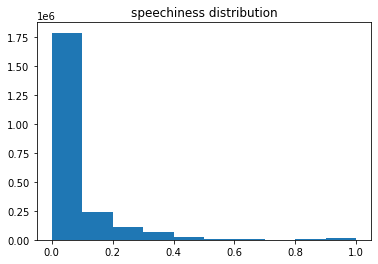


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1789530, 236626, 111162, 67750, 27350, 8175, 3025, 2351, 4338, 11884]
          
columns: tempo


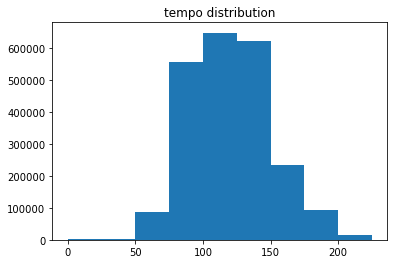


        bins   : [  0  25  50  75 100 125 150 175 200 225]
        counts : [3152, 2150, 87349, 554934, 647775, 622737, 235432, 94565, 13969]
          
columns: time_signature


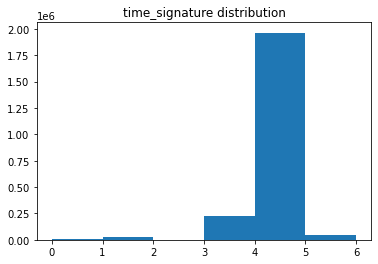


        bins   : [0 1 2 3 4 5 6]
        counts : [3206, 23827, 0, 229148, 1964207, 41803]
          
columns: valence


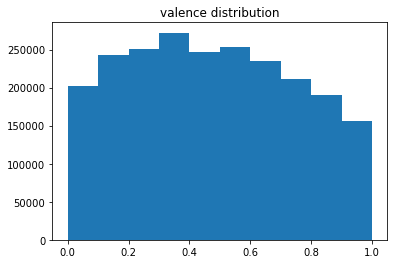


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [202438, 243270, 251219, 272108, 247398, 253887, 234782, 211567, 190046, 155476]
          


In [7]:
col_list = [
    "acousticness", 
    "danceability", 
    "energy", 
    "instrumentalness", 
    "liveness", 
    "loudness", 
    "mode", 
    "speechiness",
    "tempo", 
    "time_signature", 
    "valence"
    ]

for col in col_list:
    print(f"columns: {col}")
    
    if col in ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]:
        bins = list(np.arange(0, 1.1, 0.1))
    elif col == "loudness":
        bins = range(-60, 20, 10)
    elif col == "mode":
        bins = range(0, 3, 1)
    elif col == "tempo":
        bins = range(0, 250, 25)
    elif col == "time_signature": 
        bins = range(0, 7, 1)
        
    counts, bins, patches = plot_histogram(
                                audio_features[col].tolist(), 
                                title=f"{col} distribution",
                                bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __artists__

In [8]:
artists_file_path = "./extracted_data/artists/"
artists_output_path = "./extracted_data/artists/artists_df.pickle"

if os.path.isfile(artists_output_path) == False:
    artists_file_list = [f for f in os.listdir(artists_file_path) if f.startswith("artists") and f.endswith(".json")]
    artists_file_list.sort()

    dict_rows_list = []

    for file in artists_file_list:

        with open(os.sep.join([artists_file_path, file]), "r") as f:
            tmp = json.loads(f.read())
            
        dict_rows_list.extend(tmp.copy())

    artists = pd.DataFrame(dict_rows_list)
    artists.rename(columns={"id": "artist_id"}, inplace=True)
    artists.drop_duplicates(subset="artist_id", inplace=True)

    print(artists.shape)
    display(artists.head())

    artists.to_pickle(artists_output_path)
else:
    artists = pd.read_pickle(artists_output_path)

    print(artists.shape)
    display(artists.head())

(294126, 4)


,genres,artist_id,name,popularity
0,"[jawaiian, pacific islands pop]",4Cy6TrPbVlo9OP1MTSONo9,Josh WaWa White,39
1,[],7vo7i6D53CDdJsMI6l1bkm,Jet Chamber,0
2,"[instrumental bluegrass, progressive bluegrass]",1Stj7mbbJFkKGqasheXUVF,Russ Barenberg,30
3,"[album rock, classic canadian rock, classic ro...",3TkWygOTDBZXAdFDh9HOkG,Chilliwack,37
4,"[indiecoustica, pop folk]",0mUIey7n1U90IScto35rX7,Dave Thomas Junior,44


columns: popularity


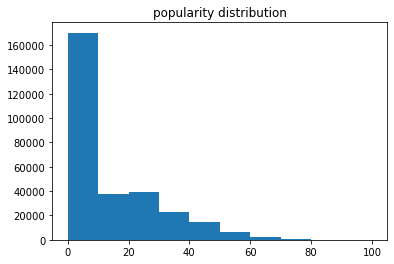


        bins   : [  0  10  20  30  40  50  60  70  80  90 100]
        counts : [170054, 37311, 39437, 23027, 14804, 6356, 2375, 629, 125, 8]
          


In [9]:
col_list = [
    "popularity"
    ]

for col in col_list:
    print(f"columns: {col}")
    
    if col == "popularity":
        bins = range(0, 110, 10)
        
    counts, bins, patches = plot_histogram(
                                artists[col].tolist(), 
                                title=f"{col} distribution",
                                bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __join tracks, albums, audio-features, artists__

### 1) load ablums data
### 2) remove null rows from albums data

In [10]:
album_file_path = "./album_table.csv"
albums = pd.read_csv(album_file_path)
albums["id"] = albums.id.str.replace(" ", "")
albums["release_date"] = albums.release_date.str.strip()
print(albums.isna().sum())

albums = albums.loc[albums.id.notna()]

print(f"columns: \n{albums.columns}")
print(f"shape: {albums.shape}")


album_type       274
artists_id       274
copyrights       274
genres           274
id               274
label           1455
name             274
popularity       274
release_date     274
total_tracks     274
track_ids        274
dtype: int64
columns: 
Index(['album_type', 'artists_id', 'copyrights', 'genres', 'id', 'label',
       'name', 'popularity', 'release_date', 'total_tracks', 'track_ids'],
      dtype='object')
shape: (845511, 11)


### 3) drop duplicates from albums data

In [11]:
print(f"unique id: {len(albums.id.unique())}")
print(f"duplicated rows: {albums.duplicated(subset='id').sum()}")
print(f"{len(albums.id.unique())} + {albums.duplicated(subset='id').sum()} = {len(albums.id.unique())+albums.duplicated(subset='id').sum()}")

albums = albums.drop_duplicates(subset="id")

unique id: 577186
duplicated rows: 268325
577186 + 268325 = 845511


### 4) combine with tracks, audio-features data
### 5) plot histogram by year
### 6) combine with artists data

tracks shape                               : (2146074, 10)
albums shape                               : (577186, 11)
audio-features shape                       : (2262191, 12)
artists shape                              : (294126, 4)
tracks and albums                          : (1910460, 11)
tracks, albums, and audio-features         : (1281183, 24)


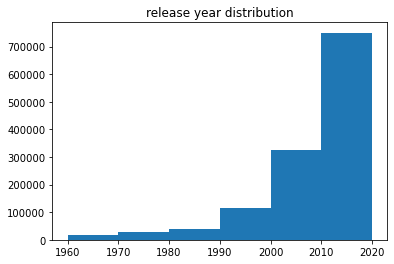


    bins   : [1960 1970 1980 1990 2000 2010 2020]
    counts : [17072, 27114, 38194, 114474, 326846, 750100]
        
tracks, albums, audio-features, and artists: (1470981, 28)


,track_id,album_id,artists_id,disc_number,duration_ms,explicit,track_name,album_popularity,track_number,duration_m,...,loudness,mode,speechiness,tempo,time_signature,valence,artist_id,genres,artist_name,artist_popularity
0,5iYe4mt1bf1KVzVM8EY6y8,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,228213,True,Du bist schön,61,19,3.803550,...,-6.508,1,0.0381,120.068,4,0.442,0r0R5nIjDY04TfxRM10Bcb,[german pop],Alligatoah,64
1,2YeiTbQiN33B4aWXAEOeZu,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,232466,True,Lass liegen,44,18,3.874433,...,-6.679,1,0.1640,143.033,4,0.814,0r0R5nIjDY04TfxRM10Bcb,[german pop],Alligatoah,64
2,00ylpioXq9EFFUbI7gay05,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,251746,True,Musik ist keine Lösung,42,20,4.195767,...,-6.072,1,0.0929,114.117,4,0.785,0r0R5nIjDY04TfxRM10Bcb,[german pop],Alligatoah,64
3,3OGlLa9RnR55xOoNOzTgDp,3ruxxNJfKwSeghjqG6JL3y,"0r0R5nIjDY04TfxRM10Bcb,6v2fKtxH2ZyVvk4tSqWeOP",1,226480,True,Trostpreis (feat. Timi Hendrix),40,10,3.774667,...,-7.079,0,0.2680,94.756,4,0.860,0r0R5nIjDY04TfxRM10Bcb,[german pop],Alligatoah,64
4,389spw2dydru3AHm42KGmO,3ruxxNJfKwSeghjqG6JL3y,"0r0R5nIjDY04TfxRM10Bcb,6v2fKtxH2ZyVvk4tSqWeOP,...",1,215172,True,Was der Bauer nicht kennt (feat. Timi Hendrix ...,34,14,3.586200,...,-5.838,1,0.0561,116.120,4,0.793,0r0R5nIjDY04TfxRM10Bcb,[german pop],Alligatoah,64


In [12]:
print(f"tracks shape                               : {tracks.shape}")
print(f"albums shape                               : {albums.shape}")
print(f"audio-features shape                       : {audio_features.shape}")
print(f"artists shape                              : {artists.shape}")

# join tracks with albums
albums_tmp = albums.loc[:, ["id", "release_date"]]
albums_tmp.rename(columns={"id": "album_id"}, inplace=True)
joined_df = pd.merge(tracks, albums_tmp, how="inner", on="album_id")
joined_df.rename(columns={"name": "track_name", "popularity": "album_popularity"}, inplace=True)
joined_df = joined_df.loc[joined_df.release_date.notna()]
joined_df = joined_df.loc[joined_df.release_date.apply(lambda x: False if x.startswith("0") else True)]
print(f"tracks and albums                          : {joined_df.shape}")

f = lambda x: int(x[:4]) if len(x) >= 5 else int(x)
joined_df["release_year"] = joined_df.release_date.apply(f)

f = lambda x: (x // 10) * 10
joined_df["release_year_bin"] = joined_df.release_year.apply(f)

# join joined_df with audio-features
joined_df = pd.merge(joined_df, audio_features, how="inner", on="track_id")
print(f"tracks, albums, and audio-features         : {joined_df.shape}")

# plot histogram by release_year
counts, bins, patches = plot_histogram(
    joined_df.release_year_bin.tolist(), 
    title="release year distribution",
    bins=range(1960, 2030, 10)
)

print(f"""
    bins   : {bins}
    counts : {list(map(int, counts))}
        """)

# join joined_df with artists
joined_df["artist_id"] = joined_df.artists_id.str.replace(" ", "").str.split(",")
joined_df = joined_df.explode("artist_id")
artists.rename(columns={"name": "artist_name", "popularity": "artist_popularity"}, inplace=True)
joined_df = pd.merge(joined_df, artists, how="inner", on="artist_id")
print(f"tracks, albums, audio-features, and artists: {joined_df.shape}")

display(joined_df.head())



### 7) cut the rows by specific release year (>= 2010) and album popularity (>= 30) and save the data
### 8) set genres, artist names and artist popularity for each track (combine all genres and artist names, and get maximum of artists popularity)
### 9) check the heatmap between album popularity and artist popularity

shape of df: (871824, 28)
the number of unique track ids: 741771
shape of df: (110164, 28)
the number of unique track ids: 89307


,track_id,artists_id,genres_combined
0,000VZqvXwT0YNqKk7iG2GS,6kQB2RN7WwryMdJ1MoQh1E,"deathcore,melodic hardcore,melodic metalcore,m..."
1,000xQL6tZNLJzIrtIgxqSl,"5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV","dance pop,pop,post-teen pop,uk pop,pop,r&b,rap..."
2,000xYdQfIZ4pDmBGzQalKU,3qvcCP2J0fWi0m0uQDUf6r,"arrocha,sertanejo,sertanejo pop,sertanejo univ..."
3,0010mZpCCwlPwoBiBsjoac,3pTE9iaJTkWns3mxpNQlJV,"alternative dance,british indie rock,indie roc..."
4,001BVhvaZTf2icV88rU3DA,"1xQIR56DxgWYZPUvOLRIua,2D0u6nyYzRpoDvJe6sOBXu",


,track_id,artists_id,artist_name_combined
0,000VZqvXwT0YNqKk7iG2GS,6kQB2RN7WwryMdJ1MoQh1E,The Ghost Inside
1,000xQL6tZNLJzIrtIgxqSl,"5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV","ZAYN,PARTYNEXTDOOR"
2,000xYdQfIZ4pDmBGzQalKU,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana
3,0010mZpCCwlPwoBiBsjoac,3pTE9iaJTkWns3mxpNQlJV,Bombay Bicycle Club
4,001BVhvaZTf2icV88rU3DA,"1xQIR56DxgWYZPUvOLRIua,2D0u6nyYzRpoDvJe6sOBXu",Valleyz


,track_id,artists_id,artist_popularity_max
0,000VZqvXwT0YNqKk7iG2GS,6kQB2RN7WwryMdJ1MoQh1E,51
1,000xQL6tZNLJzIrtIgxqSl,"5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV",75
2,000xYdQfIZ4pDmBGzQalKU,3qvcCP2J0fWi0m0uQDUf6r,73
3,0010mZpCCwlPwoBiBsjoac,3pTE9iaJTkWns3mxpNQlJV,57
4,001BVhvaZTf2icV88rU3DA,"1xQIR56DxgWYZPUvOLRIua,2D0u6nyYzRpoDvJe6sOBXu",32


,track_id,album_id,artists_id,disc_number,duration_ms,explicit,track_name,album_popularity,track_number,duration_m,...,tempo,time_signature,valence,artist_id,genres,artist_name,artist_popularity,genres_combined,artist_name_combined,artist_popularity_max
0,000VZqvXwT0YNqKk7iG2GS,75kQjmcR1YnIrBwVW1s4G1,6kQB2RN7WwryMdJ1MoQh1E,1,256478,False,Mercy,44,5,4.274633,...,124.016,4,0.106,6kQB2RN7WwryMdJ1MoQh1E,"[deathcore, melodic hardcore, melodic metalcor...",The Ghost Inside,51,"deathcore,melodic hardcore,melodic metalcore,m...",The Ghost Inside,51
1,000xQL6tZNLJzIrtIgxqSl,2kGUeTGnkLOYlinKRJe47G,"5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV",1,188490,False,Still Got Time (feat. PARTYNEXTDOOR),57,1,3.141500,...,120.963,4,0.524,5ZsFI1h6hIdQRw2ti0hz81,"[dance pop, pop, post-teen pop, uk pop]",ZAYN,75,"dance pop,pop,post-teen pop,uk pop,pop,r&b,rap...","ZAYN,PARTYNEXTDOOR",75
2,000xQL6tZNLJzIrtIgxqSl,2kGUeTGnkLOYlinKRJe47G,"5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV",1,188490,False,Still Got Time (feat. PARTYNEXTDOOR),57,1,3.141500,...,120.963,4,0.524,2HPaUgqeutzr3jx5a9WyDV,"[pop, r&b, rap, toronto rap, trap, urban conte...",PARTYNEXTDOOR,75,"dance pop,pop,post-teen pop,uk pop,pop,r&b,rap...","ZAYN,PARTYNEXTDOOR",75
3,000xYdQfIZ4pDmBGzQalKU,4QianJs5Ls4mxwcT7gDBww,3qvcCP2J0fWi0m0uQDUf6r,1,187118,False,"Eu, Você, O Mar e Ela",57,3,3.118633,...,166.018,4,0.651,3qvcCP2J0fWi0m0uQDUf6r,"[arrocha, sertanejo, sertanejo pop, sertanejo ...",Luan Santana,73,"arrocha,sertanejo,sertanejo pop,sertanejo univ...",Luan Santana,73
4,0010mZpCCwlPwoBiBsjoac,5oKWoolIuoWMG6AORvA9hL,3pTE9iaJTkWns3mxpNQlJV,1,249946,False,It's Alright Now,38,2,4.165767,...,124.993,3,0.597,3pTE9iaJTkWns3mxpNQlJV,"[alternative dance, british indie rock, indie ...",Bombay Bicycle Club,57,"alternative dance,british indie rock,indie roc...",Bombay Bicycle Club,57


/var/folders/9q/nynv72513xz5vlp8cpcm790r0000gn/T/ipykernel_41895/350906011.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["album_popularity_bin"] = tmp.album_popularity.apply(lambda x: (x // 10) * 10)
/var/folders/9q/nynv72513xz5vlp8cpcm790r0000gn/T/ipykernel_41895/350906011.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["artist_popularity_max_bin"] = tmp.artist_popularity_max.apply(lambda x: (x // 10) * 10)


album_popularity_bin             30                                          \
artist_popularity_max_bin       0         10        20        30        40    
track_id                   0.000064  0.014941  0.058821  0.071875  0.103509   

album_popularity_bin                                                         \
artist_popularity_max_bin       50        60        70        80        90    
track_id                   0.104263  0.079908  0.043571  0.012518  0.000508   

album_popularity_bin       ...        70                                \
artist_popularity_max_bin  ...       70        80        90        100   
track_id                   ...  0.001852  0.001988  0.000526  0.000009   

album_popularity_bin             80                                      90  \
artist_popularity_max_bin       60        70        80        90        70    
track_id                   0.000054  0.000281  0.000354  0.000045  0.000009   

album_popularity_bin                 
artist_popularity_max_bin       80   
track_id                   0.000009  

[1 rows x 51 columns]

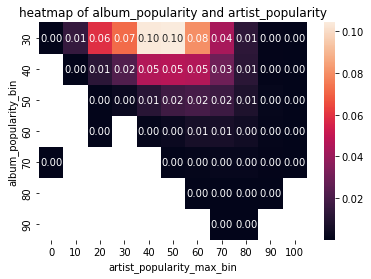

In [13]:
# cut the rows by release year(>= 2010) and album popularity(>= 30)
source = joined_df.loc[joined_df.release_year_bin == 2010]
print(f"shape of df: {source.shape}")
print(f"the number of unique track ids: {source.track_id.nunique()}")
source = source.loc[source.album_popularity >= 30]
source.sort_values(by=["track_id", "album_id"], inplace=True)

print(f"shape of df: {source.shape}")
print(f"the number of unique track ids: {source.track_id.nunique()}")

# combine all genres
grouped_genres = source.groupby(["track_id", "artists_id"])["genres"].apply(list).reset_index(name="genres_combined")
grouped_genres["genres_combined"] = grouped_genres.genres_combined.apply(lambda x: [j for i in x for j in i])
grouped_genres["genres_combined"] = grouped_genres.genres_combined.str.join(',')
display(grouped_genres.head())

# combine artist names
grouped_artist_name = source.groupby(["track_id", "artists_id"])["artist_name"].apply(list).reset_index(name="artist_name_combined")
grouped_artist_name["artist_name_combined"] = grouped_artist_name.artist_name_combined.str.join(',')
display(grouped_artist_name.head())

# get maximum of aritsts popularity
grouped_artist_popularity = source.groupby(["track_id", "artists_id"])["artist_popularity"].apply(max).reset_index(name="artist_popularity_max")
display(grouped_artist_popularity.head())

# join all the columns
source = pd.merge(source, grouped_genres, how="left", on=["track_id", "artists_id"])
source = pd.merge(source, grouped_artist_name, how="left", on=["track_id", "artists_id"])
source = pd.merge(source, grouped_artist_popularity, how="left", on=["track_id", "artists_id"])

display(source.head())

# count songs by album_popularity and artist_popularity
by = ["album_popularity_bin", "artist_popularity_max_bin"]
tmp = source.drop_duplicates(subset="track_id")
tmp["album_popularity_bin"] = tmp.album_popularity.apply(lambda x: (x // 10) * 10)
tmp["artist_popularity_max_bin"] = tmp.artist_popularity_max.apply(lambda x: (x // 10) * 10)

grouped = tmp[["track_id", "album_popularity_bin", "artist_popularity_max_bin"]].groupby(by=by).count().apply(lambda x: x / len(source))
display(grouped.transpose())

plot_heatmap(
    groupby=grouped, 
    pivot_col=["album_popularity_bin", "artist_popularity_max_bin", "track_id"],
    title="heatmap of album_popularity and artist_popularity"
)

### 10) save the dataframe as a pickle (if the file exists, then do not save the file)

In [14]:
if os.path.isfile(pickle_path_tracks) and os.path.isfile(pickle_path_track_artist):
    print("The file already exists!")
    
else:
    sample_col = [c for c in source.columns if c != "artists_id" and c != "artist_id" and c != "artist_name"]
    sample_df = source[sample_col]
    sample_df.drop_duplicates(subset="track_id", inplace=True)
    sample_df.to_pickle(pickle_path_tracks)
    
    track_artist = source[["track_id", "artist_id", "artist_name"]]
    track_artist.to_pickle(pickle_path_track_artist)
    
    print("The file does not exist, so save the dataframes as pickles.")

The file does not exist, so save the dataframes as pickles.


/var/folders/9q/nynv72513xz5vlp8cpcm790r0000gn/T/ipykernel_41895/3790700283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df.drop_duplicates(subset="track_id", inplace=True)


### 11) plot histograms for sampled data

columns: release_year


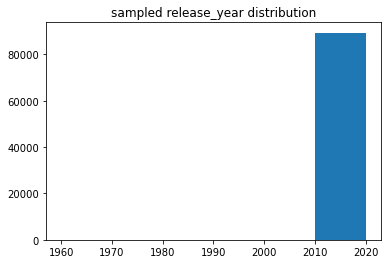


        bins   : [1960 1970 1980 1990 2000 2010 2020]
        counts : [0, 0, 0, 0, 0, 89307]
          
columns: duration_m


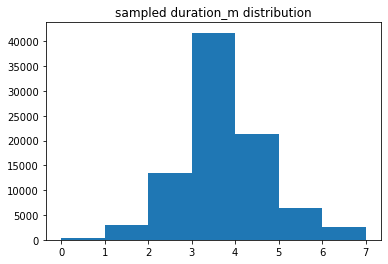


        bins   : [0 1 2 3 4 5 6 7]
        counts : [442, 3075, 13399, 41736, 21261, 6467, 2625]
          
columns: album_popularity


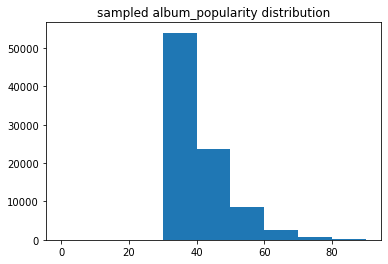


        bins   : [ 0 10 20 30 40 50 60 70 80 90]
        counts : [0, 0, 0, 53985, 23657, 8443, 2534, 605, 81]
          
columns: artist_popularity_max


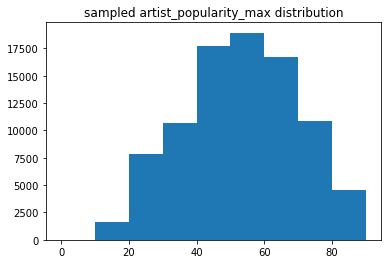


        bins   : [ 0 10 20 30 40 50 60 70 80 90]
        counts : [8, 1647, 7815, 10688, 17761, 18944, 16754, 10847, 4518]
          
columns: acousticness


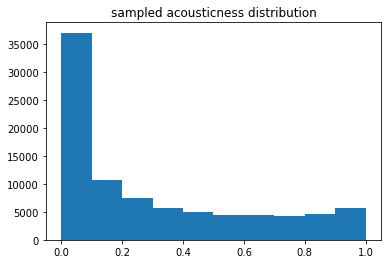


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [37079, 10661, 7404, 5779, 4960, 4487, 4379, 4282, 4649, 5627]
          
columns: danceability


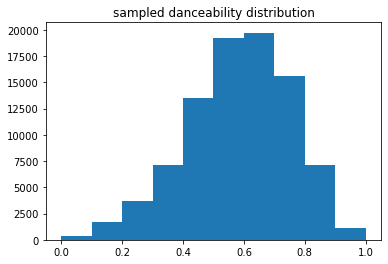


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [361, 1737, 3708, 7164, 13520, 19237, 19728, 15588, 7112, 1152]
          
columns: energy


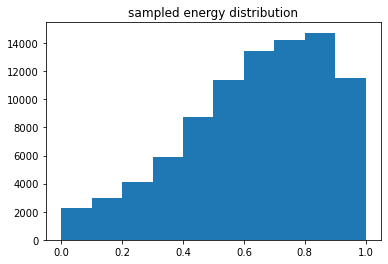


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [2265, 2979, 4133, 5876, 8745, 11355, 13464, 14257, 14742, 11491]
          
columns: instrumentalness


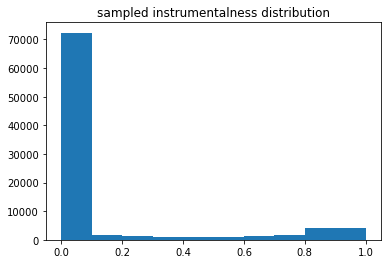


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [72348, 1839, 1188, 975, 936, 1005, 1185, 1711, 4122, 3998]
          
columns: liveness


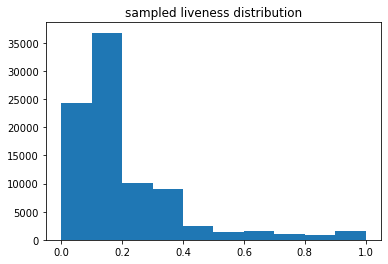


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [24387, 36808, 10122, 9023, 2382, 1440, 1614, 1113, 880, 1538]
          
columns: loudness


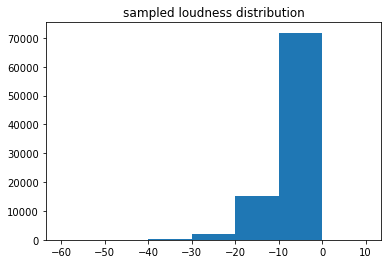


        bins   : [-60 -50 -40 -30 -20 -10   0  10]
        counts : [15, 32, 317, 1999, 15143, 71774, 27]
          
columns: mode


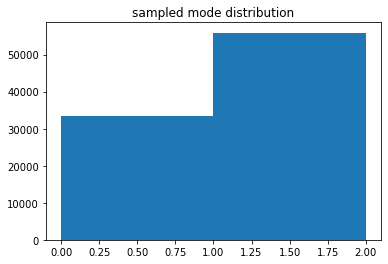


        bins   : [0 1 2]
        counts : [33391, 55916]
          
columns: speechiness


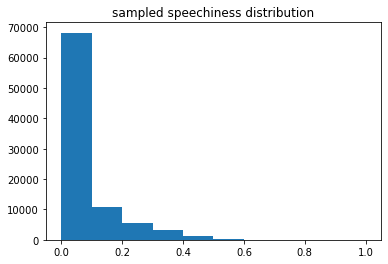


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [68175, 10767, 5488, 3127, 1180, 280, 89, 53, 51, 97]
          
columns: tempo


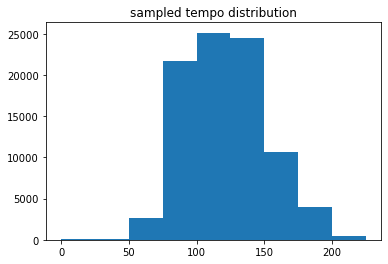


        bins   : [  0  25  50  75 100 125 150 175 200 225]
        counts : [84, 54, 2668, 21674, 25158, 24520, 10624, 4009, 516]
          
columns: time_signature


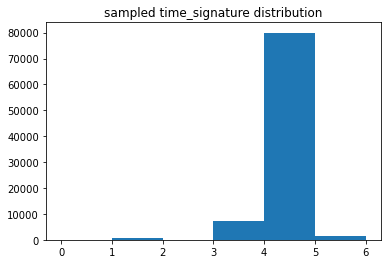


        bins   : [0 1 2 3 4 5 6]
        counts : [86, 708, 0, 7245, 79969, 1299]
          
columns: valence


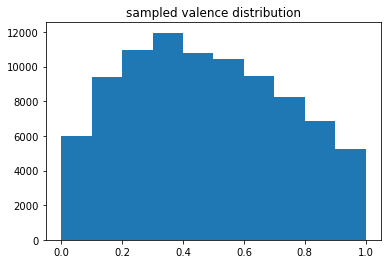


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [6020, 9371, 10957, 11953, 10785, 10460, 9457, 8232, 6838, 5234]
          


In [16]:
col_list = [
    "release_year",
    "duration_m", 
    "album_popularity",
    "artist_popularity_max",
    "acousticness", 
    "danceability", 
    "energy", 
    "instrumentalness", 
    "liveness", 
    "loudness", 
    "mode", 
    "speechiness",
    "tempo", 
    "time_signature", 
    "valence"
    ]

for col in col_list:
    print(f"columns: {col}")
    
    if col in ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]:
        bins = list(np.arange(0, 1.1, 0.1))
    elif col == "duration_m":
        bins = range(0, 8, 1)
    elif col in ["album_popularity", "artist_popularity_max"]:
        bins = range(0, 100, 10)
    elif col == "loudness":
        bins = range(-60, 20, 10)
    elif col == "mode":
        bins = range(0, 3, 1)
    elif col == "tempo":
        bins = range(0, 250, 25)
    elif col == "time_signature": 
        bins = range(0, 7, 1)
    elif col == "release_year":
        bins=range(1960, 2030, 10)
        
    counts, bins, patches = plot_histogram(
                                sample_df[col].tolist(), 
                                title=f"sampled {col} distribution",
                                bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)